<h1>CORRELATION IN PYTHON</h1> 

# Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
matplotlib.use
import matplotlib.pyplot as plt
#plt.stlyle.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots

# Read in the data

In [2]:
df = pd.read_csv(r"C:\Users\kemik\Documents\GitHub\PortfolioProjects\Datasets\movies.csv")
df.shape

(5421, 15)

In [3]:

df

,name,rating,genre,released,year,budget,gross,score,votes,director,writer,star,country,company,runtime
0,The Shining,R,Drama,"June 13, 1980 (United States)",1980,19000000,46998772,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",1980,4500000,58853106,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",1980,18000000,538375067,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,Lucasfilm,124
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",1980,3500000,83453539,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,Paramount Pictures,88
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",1980,6000000,39846344,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,Orion Pictures,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5416,Bad Boys for Life,R,Action,"January 17, 2020 (United States)",2020,90000000,426505244,6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,Columbia Pictures,124
5417,Sonic the Hedgehog,PG,Action,"February 14, 2020 (United States)",2020,85000000,319715683,6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,Paramount Pictures,99
5418,Dolittle,PG,Adventure,"January 17, 2020 (United States)",2020,175000000,245487753,5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,Universal Pictures,101
5419,The Call of the Wild,PG,Adventure,"February 21, 2020 (United States)",2020,135000000,111105497,6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,20th Century Studios,100


# Check for missing values

In [4]:
for column in df.columns:
    percent_missing=np.mean(df[column].isnull())
    print('{}, {}'.format (column, percent_missing))

name, 0.0
rating, 0.0
genre, 0.0
released, 0.0
year, 0.0
budget, 0.0
gross, 0.0
score, 0.0
votes, 0.0
director, 0.0
writer, 0.0
star, 0.0
country, 0.0
company, 0.0
runtime, 0.0


# Check the data types for the columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5421 entries, 0 to 5420
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5421 non-null   object 
 1   rating    5421 non-null   object 
 2   genre     5421 non-null   object 
 3   released  5421 non-null   object 
 4   year      5421 non-null   int64  
 5   budget    5421 non-null   int64  
 6   gross     5421 non-null   int64  
 7   score     5421 non-null   float64
 8   votes     5421 non-null   int64  
 9   director  5421 non-null   object 
 10  writer    5421 non-null   object 
 11  star      5421 non-null   object 
 12  country   5421 non-null   object 
 13  company   5421 non-null   object 
 14  runtime   5421 non-null   int64  
dtypes: float64(1), int64(5), object(9)
memory usage: 635.4+ KB


In [6]:
# Redefine the data types of coumns 'budget' and 'gross' to remove the decimal point
df['budget']=df['budget'].astype('int64')
df['gross']=df['gross'].astype('int64')

In [7]:
df.dtypes

name         object
rating       object
genre        object
released     object
year          int64
budget        int64
gross         int64
score       float64
votes         int64
director     object
writer       object
star         object
country      object
company      object
runtime       int64
dtype: object

In [8]:
df=df.sort_values(by=['gross'], inplace=False,ascending=False)

In [9]:
# pd.set_option('display.max_rows', None)

In [10]:
df

,name,rating,genre,released,year,budget,gross,score,votes,director,writer,star,country,company,runtime
3731,Avatar,PG-13,Action,"December 18, 2009 (United States)",2009,237000000,2847246203,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,Twentieth Century Fox,162
5302,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",2019,356000000,2797501328,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,Marvel Studios,181
1795,Titanic,PG-13,Drama,"December 19, 1997 (United States)",1997,200000000,2201647264,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,Twentieth Century Fox,194
4730,Star Wars: Episode VII - The Force Awakens,PG-13,Action,"December 18, 2015 (United States)",2015,245000000,2069521700,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,Lucasfilm,138
5158,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",2018,321000000,2048359754,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,Marvel Studios,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3898,Tanner Hall,R,Drama,"January 15, 2015 (Sweden)",2015,3000000,5073,5.8,3500,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,Two Prong Lesson,96
1378,Philadelphia Experiment II,PG-13,Action,"June 4, 1994 (South Korea)",1994,5000000,2970,4.5,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,Trimark Pictures,97
2286,Ginger Snaps,Not Rated,Drama,"May 11, 2001 (Canada)",2001,5000000,2554,6.8,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,Copperheart Entertainment,108
154,Parasite,R,Horror,"March 12, 1982 (United States)",1982,800000,2270,3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,Embassy Pictures,85


# Check for duplicated data

In [11]:
duplicated_data=df[df.duplicated(keep=False)]

print('number of rows with duplicated data:', 
      duplicated_data.shape[0])


number of rows with duplicated data: 0


In [12]:
df

,name,rating,genre,released,year,budget,gross,score,votes,director,writer,star,country,company,runtime
3731,Avatar,PG-13,Action,"December 18, 2009 (United States)",2009,237000000,2847246203,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,Twentieth Century Fox,162
5302,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",2019,356000000,2797501328,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,Marvel Studios,181
1795,Titanic,PG-13,Drama,"December 19, 1997 (United States)",1997,200000000,2201647264,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,Twentieth Century Fox,194
4730,Star Wars: Episode VII - The Force Awakens,PG-13,Action,"December 18, 2015 (United States)",2015,245000000,2069521700,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,Lucasfilm,138
5158,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",2018,321000000,2048359754,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,Marvel Studios,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3898,Tanner Hall,R,Drama,"January 15, 2015 (Sweden)",2015,3000000,5073,5.8,3500,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,Two Prong Lesson,96
1378,Philadelphia Experiment II,PG-13,Action,"June 4, 1994 (South Korea)",1994,5000000,2970,4.5,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,Trimark Pictures,97
2286,Ginger Snaps,Not Rated,Drama,"May 11, 2001 (Canada)",2001,5000000,2554,6.8,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,Copperheart Entertainment,108
154,Parasite,R,Horror,"March 12, 1982 (United States)",1982,800000,2270,3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,Embassy Pictures,85


# Budget vs Gross

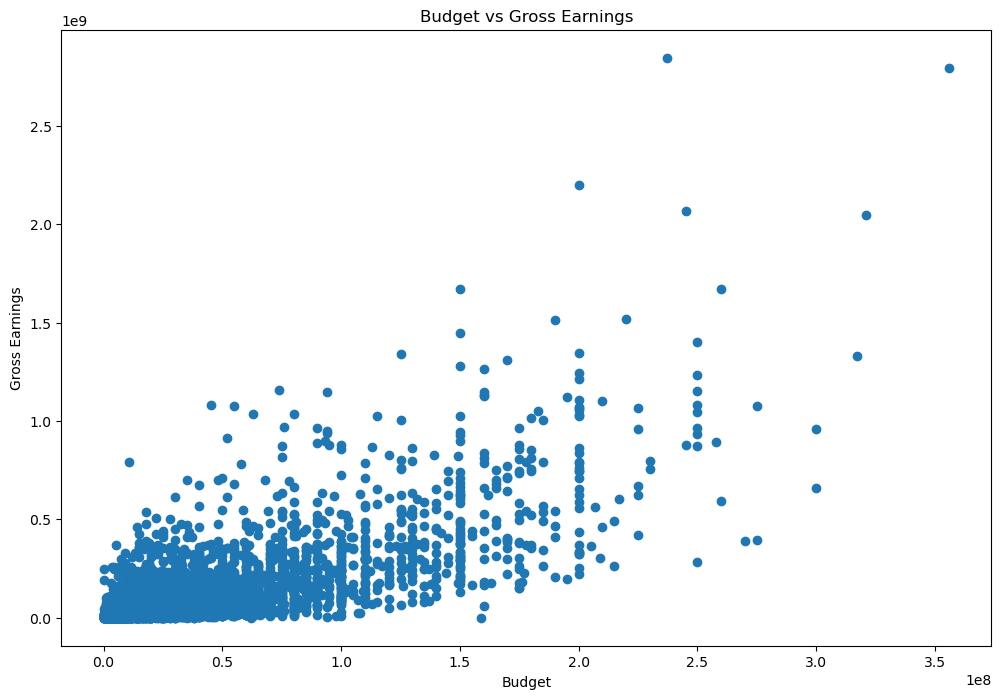

In [13]:
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget')
plt.ylabel('Gross Earnings')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

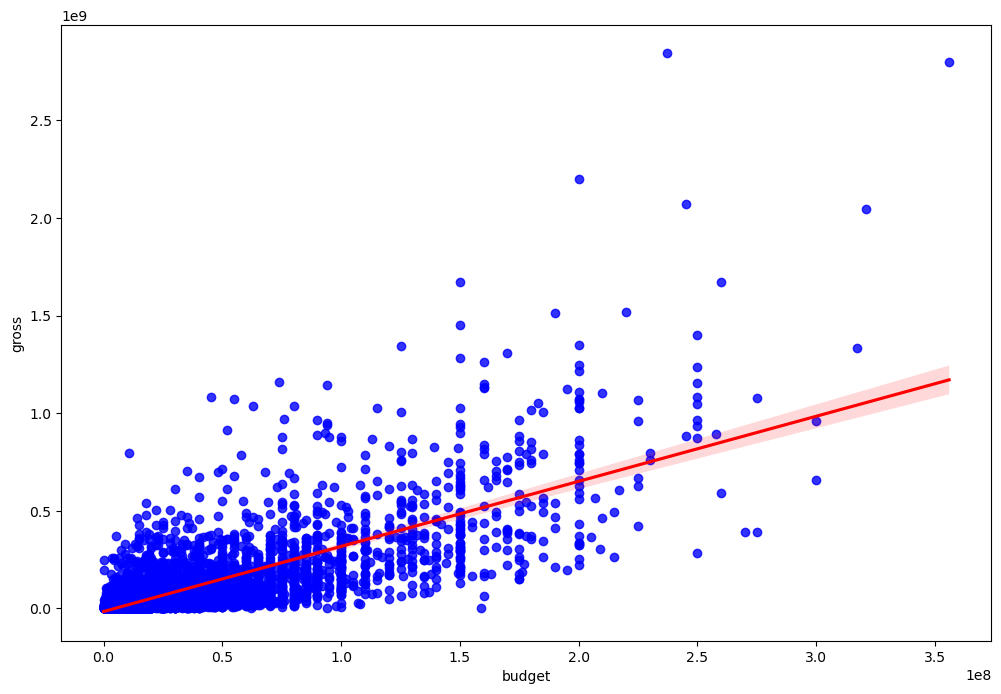

In [14]:
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"blue"}, line_kws={"color":"red"})

In [15]:
df.corr(method='pearson', numeric_only=True) #pearson, kendall, spearman

,year,budget,gross,score,votes,runtime
year,1.000000,0.320312,0.268721,0.061923,0.203098,0.075294
budget,0.320312,1.000000,0.740247,0.072001,0.439675,0.318695
gross,0.268721,0.740247,1.000000,0.222556,0.614751,0.275796
score,0.061923,0.072001,0.222556,1.000000,0.474256,0.414068
votes,0.203098,0.439675,0.614751,0.474256,1.000000,0.352303
runtime,0.075294,0.318695,0.275796,0.414068,0.352303,1.000000


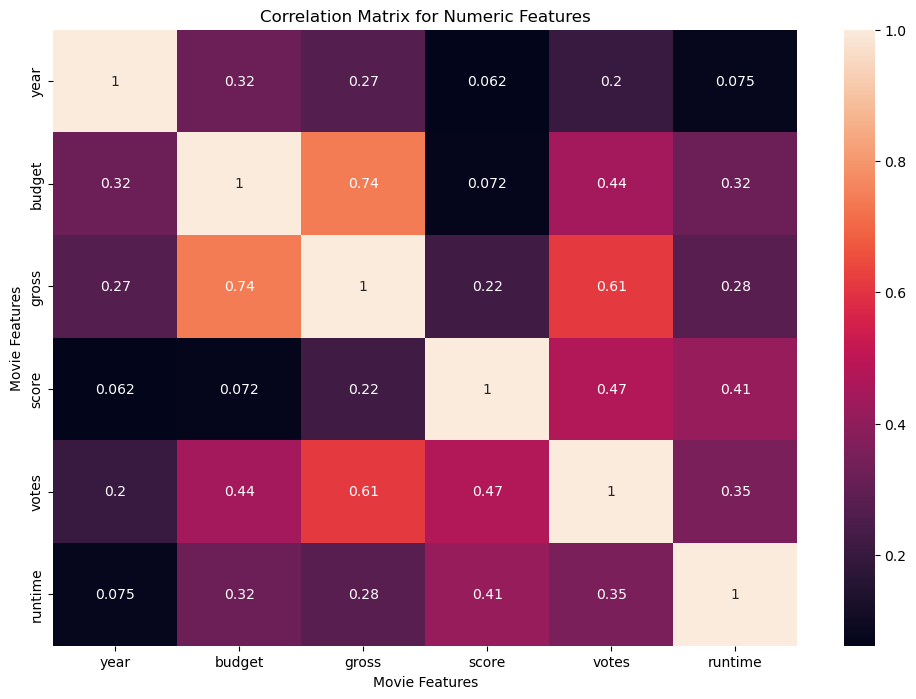

In [16]:
correlation_matrix=df.corr(method='pearson', numeric_only=True)

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [17]:
df_numerized=df
for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtypes=='object'):
        df_numerized[col_name]=df_numerized[col_name].astype('category')
        df_numerized[col_name]=df_numerized[col_name].cat.codes

        
    
df_numerized

,name,rating,genre,released,year,budget,gross,score,votes,director,writer,star,country,company,runtime
3731,386,5,0,527,2009,237000000,2847246203,7.8,1100000,785,1263,1534,47,1382,162
5302,388,5,0,137,2019,356000000,2797501328,8.4,903000,105,513,1470,47,983,181
1795,4909,5,6,534,1997,200000000,2201647264,7.8,1100000,785,1263,1073,47,1382,194
4730,3643,5,0,529,2015,245000000,2069521700,7.8,876000,768,1806,356,47,945,138
5158,389,5,0,145,2018,321000000,2048359754,8.4,897000,105,513,1470,47,983,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3898,3794,6,6,890,2015,3000000,5073,5.8,3500,585,2924,1498,47,1385,96
1378,2969,5,0,1467,1994,5000000,2970,4.5,1900,1805,3102,186,47,1376,97
2286,1595,3,6,1721,2001,5000000,2554,6.8,43000,952,1683,527,6,466,108
154,2909,6,9,1525,1982,800000,2270,3.9,2300,261,55,1473,47,582,85


In [18]:
df_numerized.corr()

,name,rating,genre,released,year,budget,gross,score,votes,director,writer,star,country,company,runtime
name,1.000000,-0.029234,0.010996,-0.006152,0.025542,0.023392,0.005639,0.014450,0.012615,0.015246,0.012880,-0.006882,-0.025490,0.021697,0.010850
rating,-0.029234,1.000000,0.147796,0.018083,0.022021,-0.203946,-0.181906,0.065983,0.006031,0.014656,-0.003149,0.009196,0.008230,-0.092357,0.140792
genre,0.010996,0.147796,1.000000,0.022142,-0.069147,-0.368523,-0.244101,0.035106,-0.135990,-0.008553,0.017578,0.003341,-0.009164,-0.071334,-0.059237
released,-0.006152,0.018083,0.022142,1.000000,-0.005989,0.019952,0.008501,0.045874,0.028833,0.002308,0.008072,0.015706,-0.017228,-0.002407,0.008975
year,0.025542,0.022021,-0.069147,-0.005989,1.000000,0.320312,0.268721,0.061923,0.203098,-0.037371,-0.025495,-0.032687,-0.073569,-0.018806,0.075294
budget,0.023392,-0.203946,-0.368523,0.019952,0.320312,1.000000,0.740247,0.072001,0.439675,-0.009662,-0.039466,-0.021473,0.052977,0.170235,0.318695
gross,0.005639,-0.181906,-0.244101,0.008501,0.268721,0.740247,1.000000,0.222556,0.614751,-0.029560,-0.035885,-0.000004,0.060078,0.149553,0.275796
score,0.014450,0.065983,0.035106,0.045874,0.061923,0.072001,0.222556,1.000000,0.474256,0.005413,0.012843,0.007296,-0.043051,0.020656,0.414068
votes,0.012615,0.006031,-0.135990,0.028833,0.203098,0.439675,0.614751,0.474256,1.000000,-0.010376,-0.005316,-0.017638,0.041551,0.118470,0.352303
director,0.015246,0.014656,-0.008553,0.002308,-0.037371,-0.009662,-0.029560,0.005413,-0.010376,1.000000,0.261735,0.036593,0.011133,-0.008223,0.017433


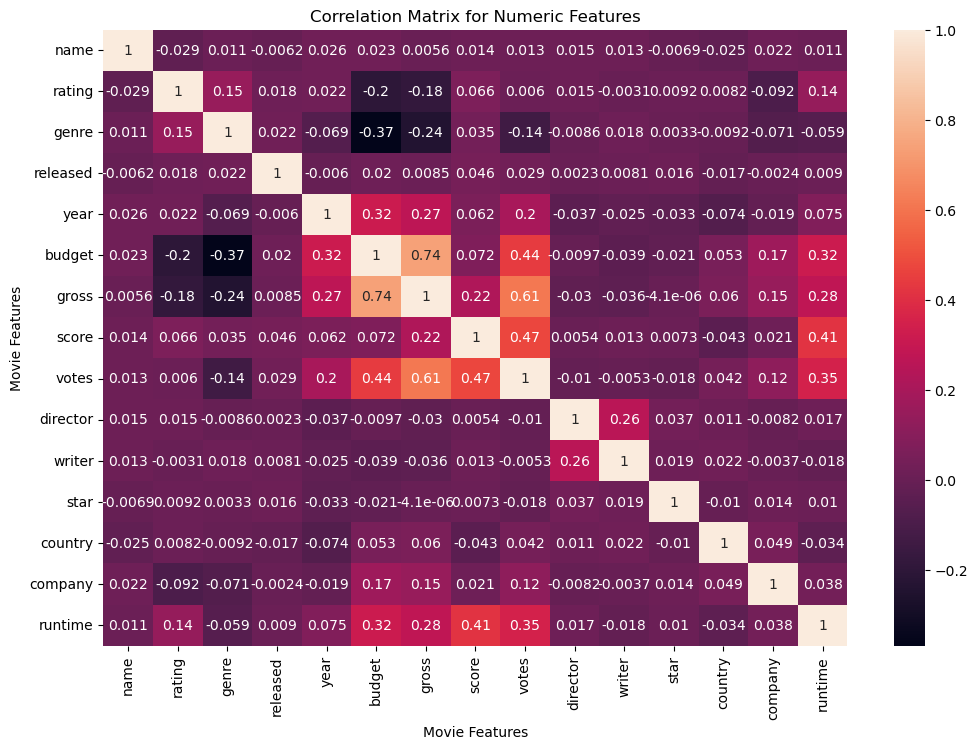

In [19]:
correlation_matrix=df_numerized.corr(method='pearson', numeric_only=True)

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [20]:
correlation_mat= df_numerized.corr()
corr_pairs= correlation_mat.unstack()
corr_pairs

name     name        1.000000
         rating     -0.029234
         genre       0.010996
         released   -0.006152
         year        0.025542
                       ...   
runtime  writer     -0.017561
         star        0.010108
         country    -0.034477
         company     0.037585
         runtime     1.000000
Length: 225, dtype: float64

In [21]:
sorted_pairs=corr_pairs.sort_values()
sorted_pairs

genre     budget     -0.368523
budget    genre      -0.368523
genre     gross      -0.244101
gross     genre      -0.244101
rating    budget     -0.203946
                        ...   
released  released    1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
Length: 225, dtype: float64

In [22]:
high_corr=sorted_pairs[(sorted_pairs)>0.43]
high_corr

budget    votes       0.439675
votes     budget      0.439675
          score       0.474256
score     votes       0.474256
votes     gross       0.614751
gross     votes       0.614751
          budget      0.740247
budget    gross       0.740247
name      name        1.000000
score     score       1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
director  director    1.000000
votes     votes       1.000000
gross     gross       1.000000
budget    budget      1.000000
year      year        1.000000
released  released    1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

##### Votes and Budget have the highest correlation to Gross Earnings